
# TP1: vision_computadora_I (21Co2025)

# Integrantes

1. Sebastian Biagiola
2. Erlin Rey
3. Santiago Casado
5. Daniel Bazán
6. Jonathan Matias Borda

Parte 1 (imágenes en /white_patch):
1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
2. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de
White patch

Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y
visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas
entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección
de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

## Parte 1 (imágenes en /white_patch):
###1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

## Parte 2:
### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

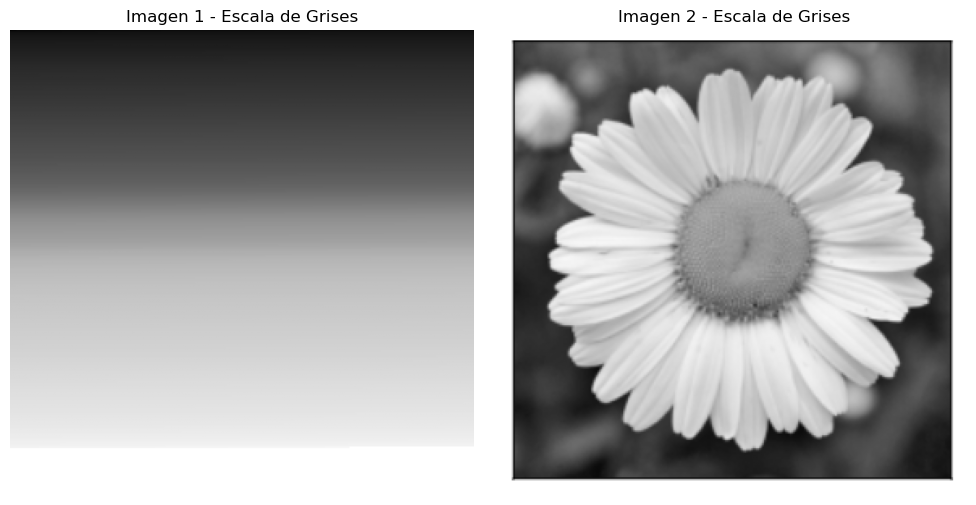

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np

# Cargar las imágenes
img1_path = 'img1_tp.png'
img2_path = 'img2_tp.png'

# Leer y visualizar las imágenes en escala de grises
try:
    img1_gray = cv.imread(img1_path, cv.IMREAD_GRAYSCALE)
    img2_gray = cv.imread(img2_path, cv.IMREAD_GRAYSCALE)

    if img1_gray is None or img2_gray is None:
        raise FileNotFoundError("Una o ambas imágenes no se pudieron cargar.")

    # Crear una figura con dos subplots para mostrar ambas imágenes
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Visualizar la primera imagen
    axes[0].imshow(img1_gray, cmap='gray')
    axes[0].set_title('Imagen 1 - Escala de Grises')
    axes[0].axis('off')

    # Visualizar la segunda imagen
    axes[1].imshow(img2_gray, cmap='gray')
    axes[1].set_title('Imagen 2 - Escala de Grises')
    axes[1].axis('off')
    
    # Ajustar el diseño y mostrar la figura
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(e)
    print(f"Verifica que los archivos '{os.path.basename(img1_path)}' y '{os.path.basename(img2_path)}' estén en el directorio correcto.")
    print(f"Asegúrate de que los archivos '{os.path.basename(img1_path)}' y '{os.path.basename(img2_path)}' estén en el directorio correcto.")

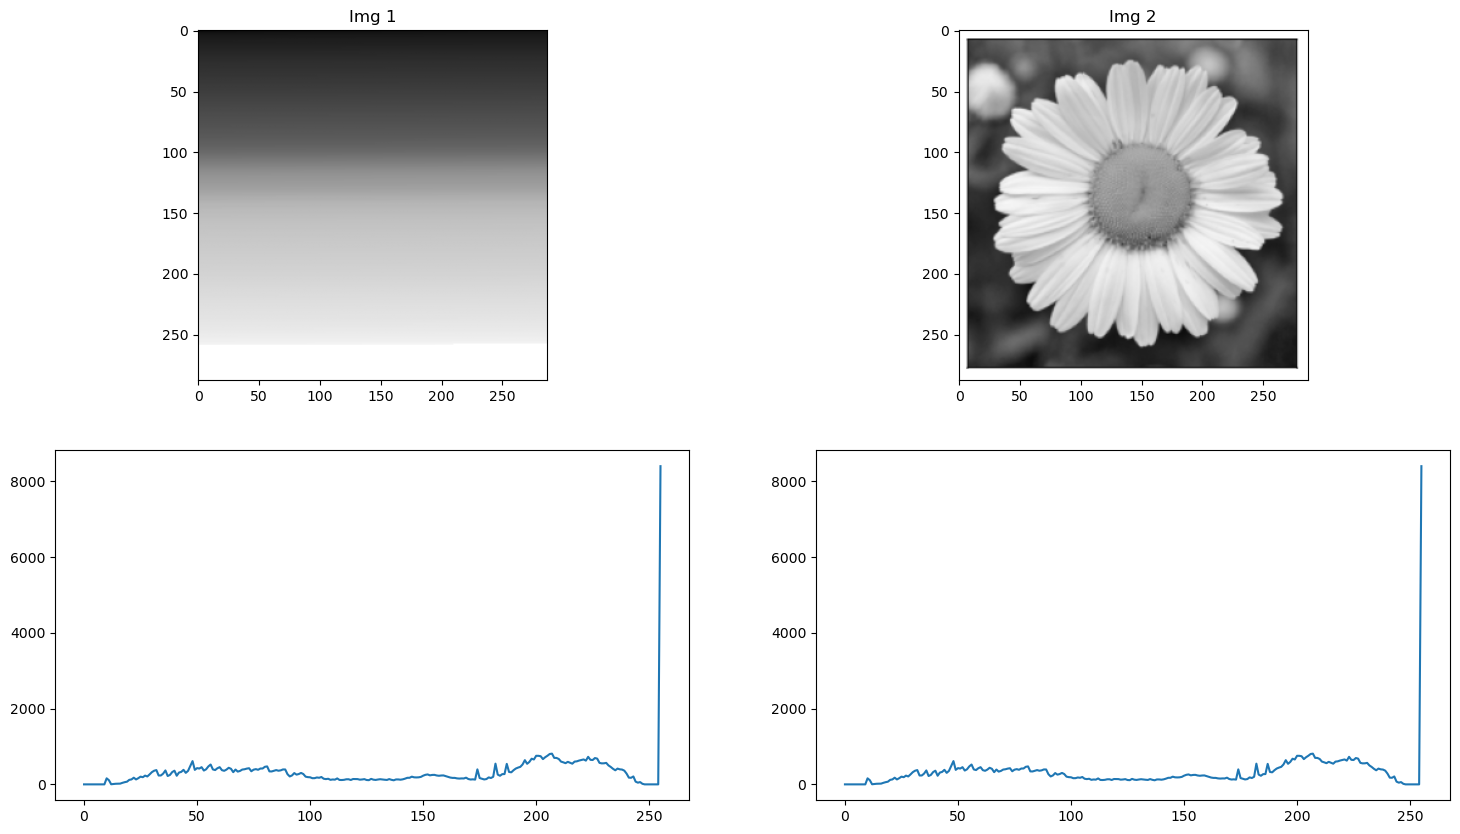

In [3]:
# Nueva figura
fig = plt.figure(figsize=(18, 10))

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Img 1')

hist1,bins1 = np.histogram(img1_gray.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen ecualizada
ax2=plt.subplot(222)
ax2.imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Img 2')

hist2,bins2 = np.histogram(img2_gray.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()

#

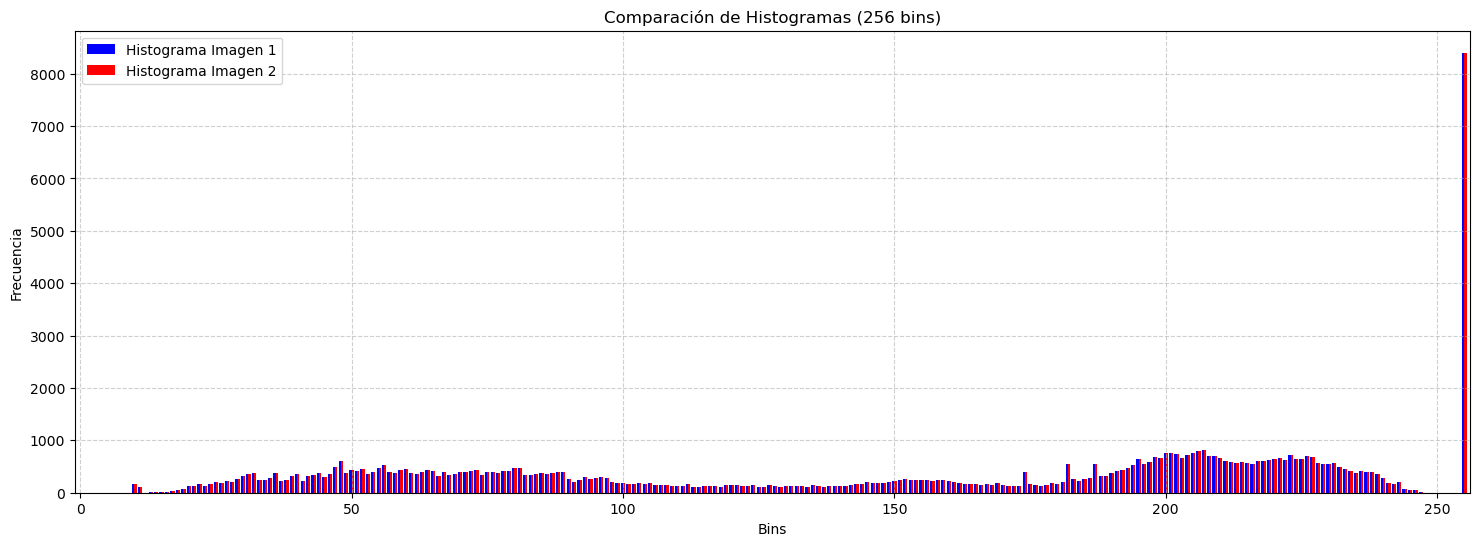

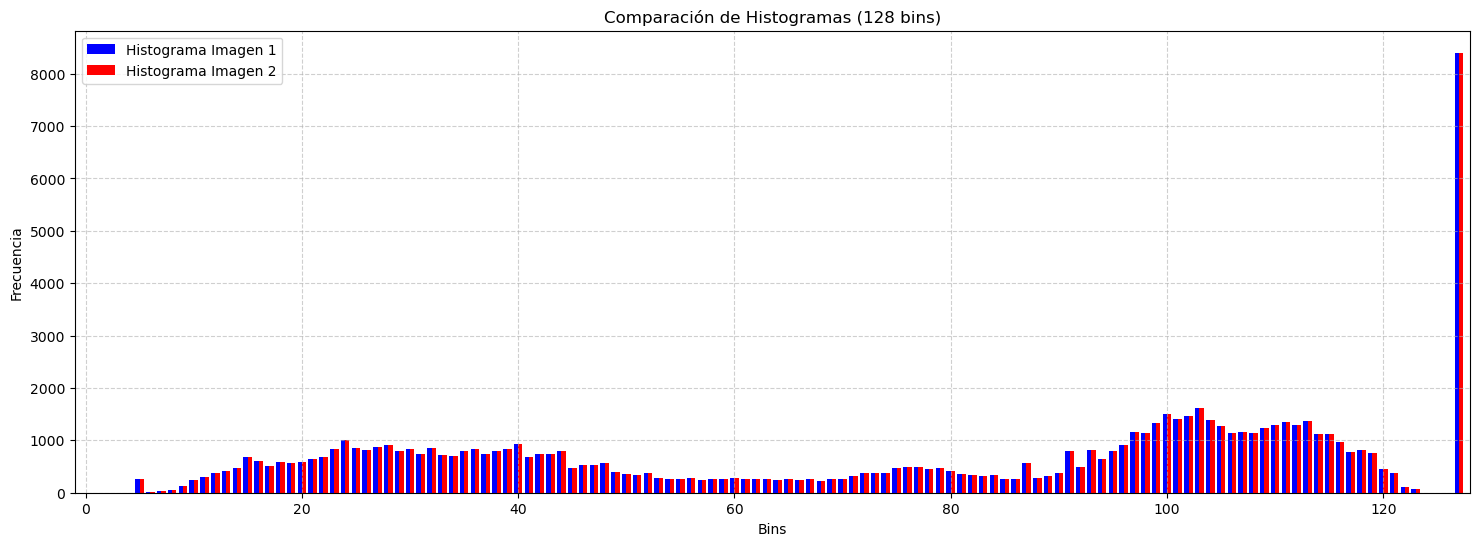

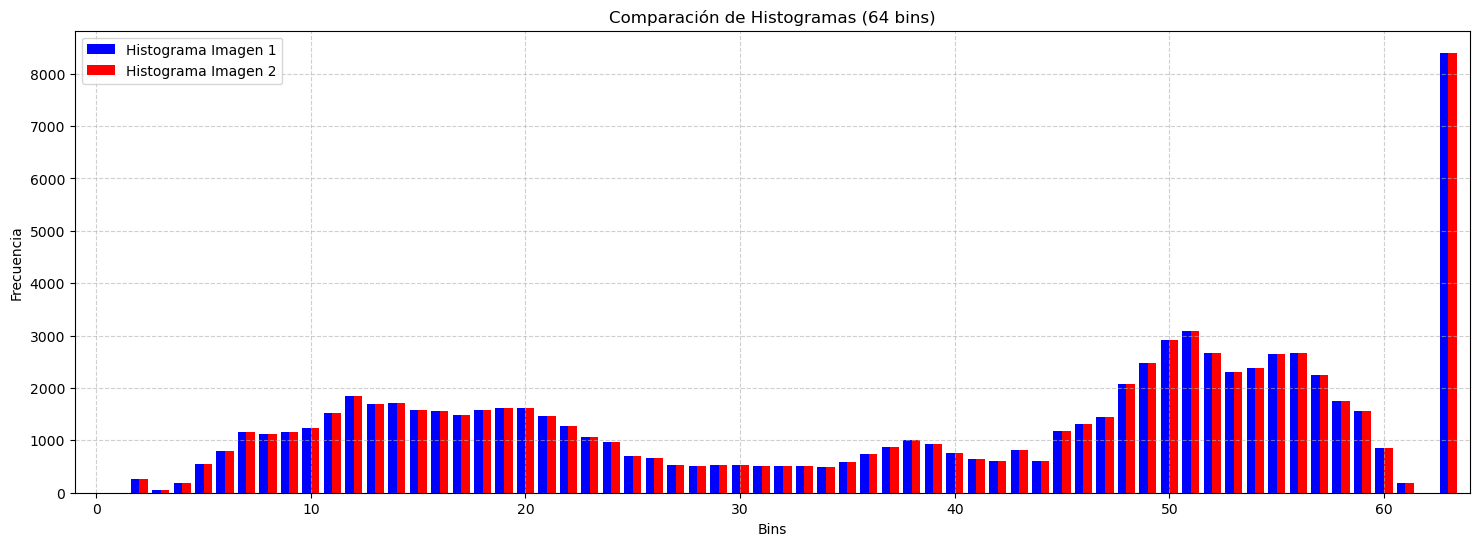

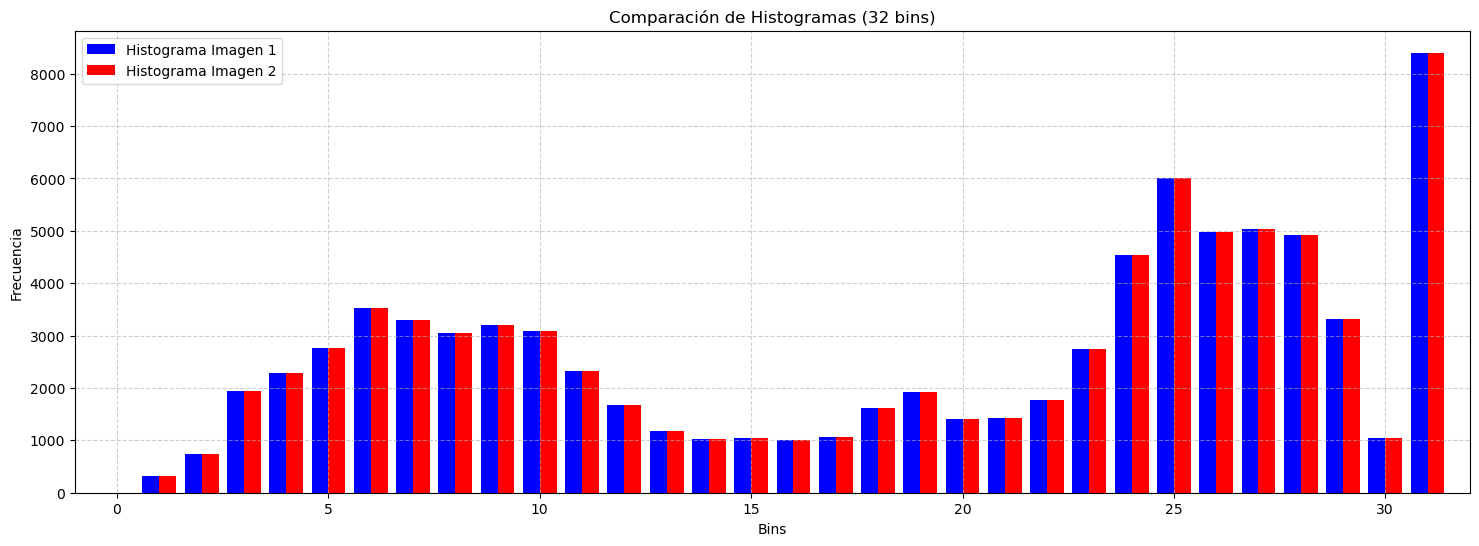

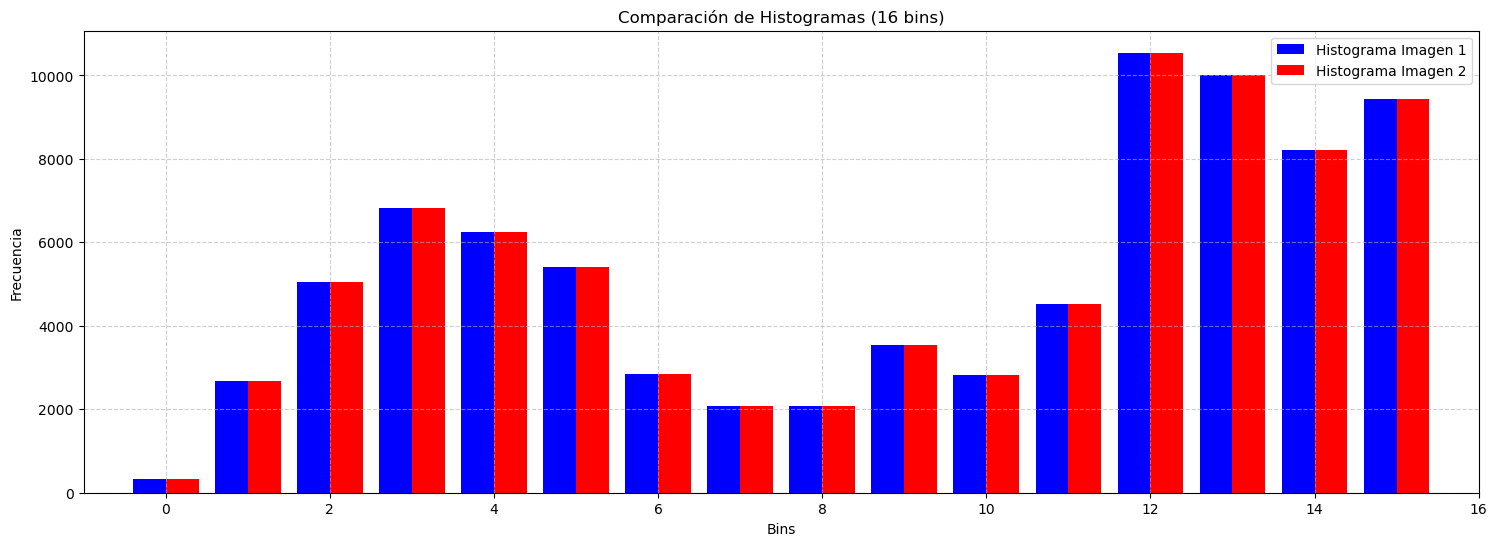

In [4]:

bin_options = [256, 128, 64, 32, 16]


for bins in bin_options:
    # --- Cálculos específicos para esta iteración ---
    # Posiciones en el eje X para cada bin
    x_pos = np.arange(bins)
    # Ancho de cada barra individual
    ancho_barra = 0.4
    
    
    plt.figure(figsize=(18, 6))
    
    # Calcular ambos histogramas con el número actual de bins
    hist1, _ = np.histogram(img1_gray.ravel(), bins, [0, 256])
    hist2, _ = np.histogram(img2_gray.ravel(), bins, [0, 256])

   
    plt.bar(x_pos - ancho_barra/2, hist1, width=ancho_barra, color='blue', label='Histograma Imagen 1')
    # Dibujamos las barras del Histograma 2, desplazadas a la derecha
    plt.bar(x_pos + ancho_barra/2, hist2, width=ancho_barra, color='red', label='Histograma Imagen 2')

    
    plt.title(f'Comparación de Histogramas ({bins} bins)')
    plt.xlabel('Bins')
    plt.ylabel('Frecuencia')
    plt.xlim([-1, bins])
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    
    plt.show()

### Elección del Número de Bins

Para determinar la representación más adecuada de la distribución de intensidades de las imágenes `img1_tp.png` y `img2_tp.png`, se generaron histogramas comparativos utilizando diferentes resoluciones: 256, 128, 64, 32 y 16 bins. El objetivo era encontrar un balance entre la fidelidad a los datos y la claridad visual para la interpretación.

El análisis de los resultados arrojó las siguientes observaciones:

* **Alta Resolución (256 y 128 bins):** Si bien estas configuraciones ofrecen la máxima fidelidad a los datos, la alta variabilidad o "ruido" en la frecuencia de bins adyacentes dificulta la identificación de la tendencia general de la distribución. La forma subyacente de los histogramas queda parcialmente oculta por la gran cantidad de picos.

* **Baja Resolución (32 y 16 bins):** En el extremo opuesto, estas configuraciones agrupan excesivamente los niveles de gris, resultando en una pérdida significativa de información. La forma característica de las distribuciones se desdibuja, y solo se puede apreciar una tendencia muy generalizada, sacrificando detalles estructurales importantes.

* **Resolución Óptima (64 bins):** Se ha determinado que un tamaño de **64 bins** representa el balance óptimo para este caso de estudio. Esta configuración logra:
    * Suavizar eficazmente el ruido presente en las versiones de mayor resolución.
    * Preservar con claridad las características fundamentales de las distribuciones, como la ubicación de sus picos principales y su dispersión general.
    * Facilitar una comparación visual directa y clara entre los dos histogramas, permitiendo una interpretación más sencilla de sus diferencias.

Por lo tanto, se concluye que para futuros análisis o extracción de características de estas imágenes, se recomienda utilizar una resolución de **64 bins**, ya que ofrece la representación más útil y legible de la distribución de intensidades sin sacrificar detalles estructurales clave.

Text(0, 0.5, 'Frecuencia')

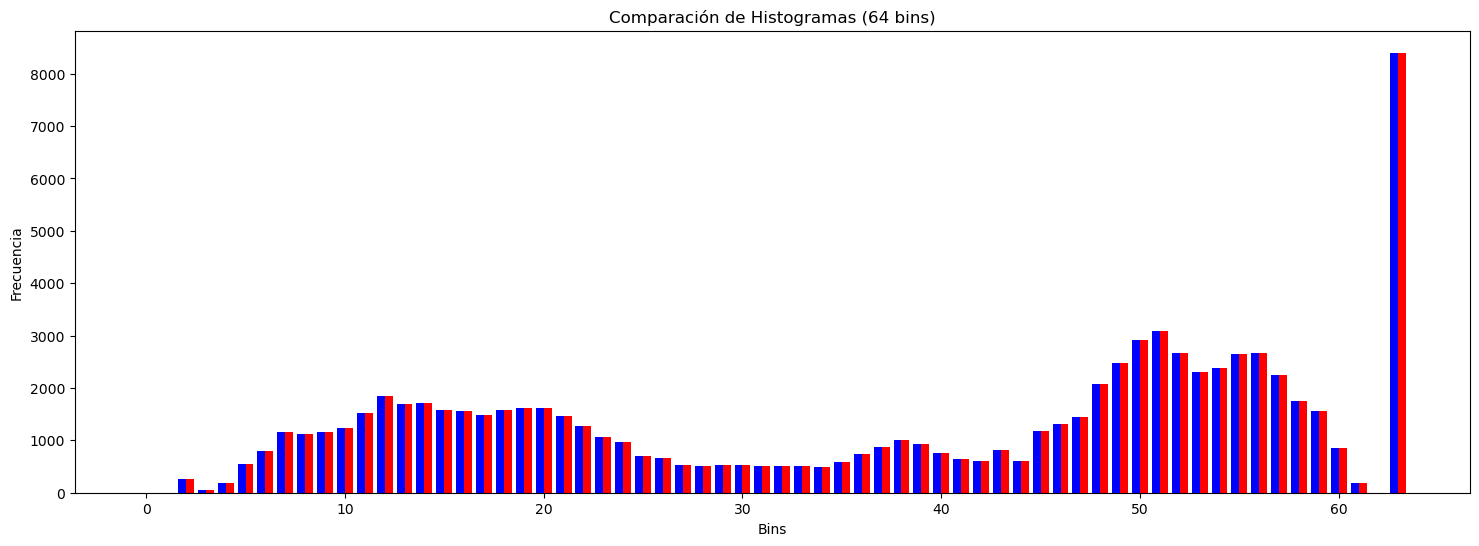

In [5]:

bins = 64
x_pos = np.arange(bins)
ancho_barra = 0.4
plt.figure(figsize=(18, 6))


hist1, _ = np.histogram(img1_gray.ravel(), bins, [0, 256])
hist2, _ = np.histogram(img2_gray.ravel(), bins, [0, 256])

plt.bar(x_pos - ancho_barra/2, hist1, width=ancho_barra, color='blue', label='Histograma Imagen 1')
plt.bar(x_pos + ancho_barra/2, hist2, width=ancho_barra, color='red', label='Histograma Imagen 2')

plt.title(f'Comparación de Histogramas ({bins} bins)')
plt.xlabel('Bins')
plt.ylabel('Frecuencia')




## Observaciones de la comparación de histogramas

Un análisis profundo de las imágenes `img1_tp.png` y `img2_tp.png` revela un fenómeno de gran interés para la visión por computadora: a pesar de ser dos imágenes visualmente distintas en cuanto a la disposición espacial de sus elementos, sus histogramas de intensidad son estadísticamente idénticos. Como se demostró en la gráfica comparativa, las distribuciones de frecuencia de los niveles de gris para ambas imágenes coinciden bin a bin. Esto confirma que ambas comparten las mismas propiedades tonales globales: son igualmente oscuras, poseen el mismo contraste y tienen una idéntica composición de valores de píxeles en general.

* El histograma es claramente **bimodal**:  
  - Un pico en intensidades **altas** 
  - Un pico en intensidades **bajas**  
  - Escasa presencia en los niveles intermedios.  

## Utilidad de los histogramas como *features*

- **Sí son útiles** como representación global:  
  - Capturan información sobre **brillo, contraste y textura general**.  
  - Permiten distinguir escenas con distribuciones de intensidades diferentes (ej. día/noche, radiografías con distintos contrastes, imágenes sintéticas vs. naturales).

- **Limitaciones:**  
  - No capturan información **espacial** (ubicación de los píxeles de cada intensidad).  
  - Son sensibles a variaciones de **iluminación y exposición**.  

- **Buenas prácticas para usarlos en ML:**  
  - Normalizar los histogramas (ej. L1 → suma = 1) para compararlos entre imágenes de distinto tamaño.  
  - Dividir la imagen en **bloques** (ej. 2×2) y concatenar los histogramas para añadir información espacial.  
  - Complementar con otros descriptores como **LBP/GLCM** (textura), **HOG** (forma), o emplear **CNNs** que aprenden *features* automáticamente.  
  - Para comparar histogramas, usar métricas como **Bhattacharyya**, **χ²** o **intersección**.

---

## Conclusión
Los histogramas de intensidades en escala de grises son un **feature simple pero informativo** que resulta útil en tareas de clasificación o detección básicas.  
No obstante, para problemas más complejos es recomendable combinarlos con métodos que capturen información local y espacial.


### A continuación se procede a realizar algunos tratamientos de ecualización vistos en clase

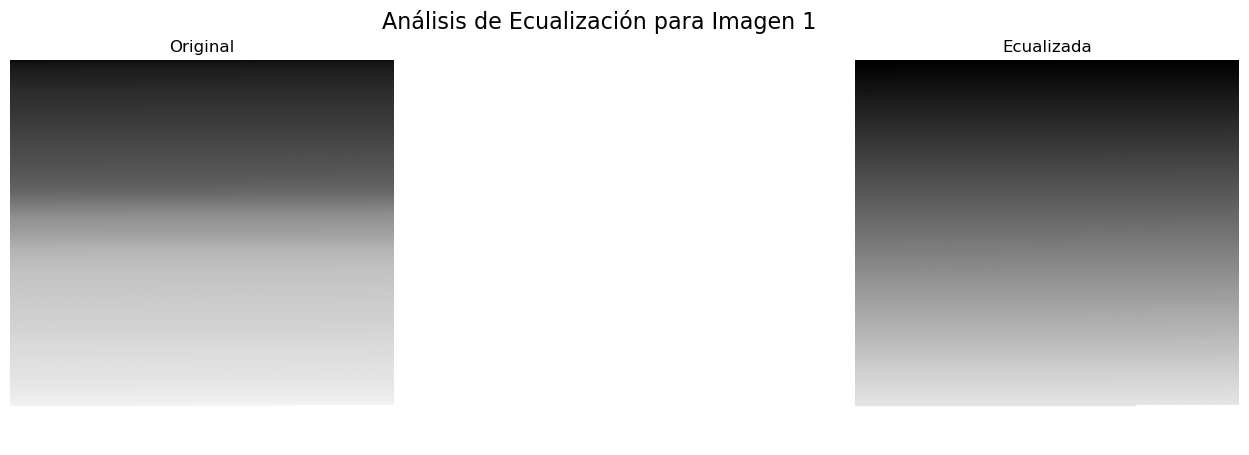

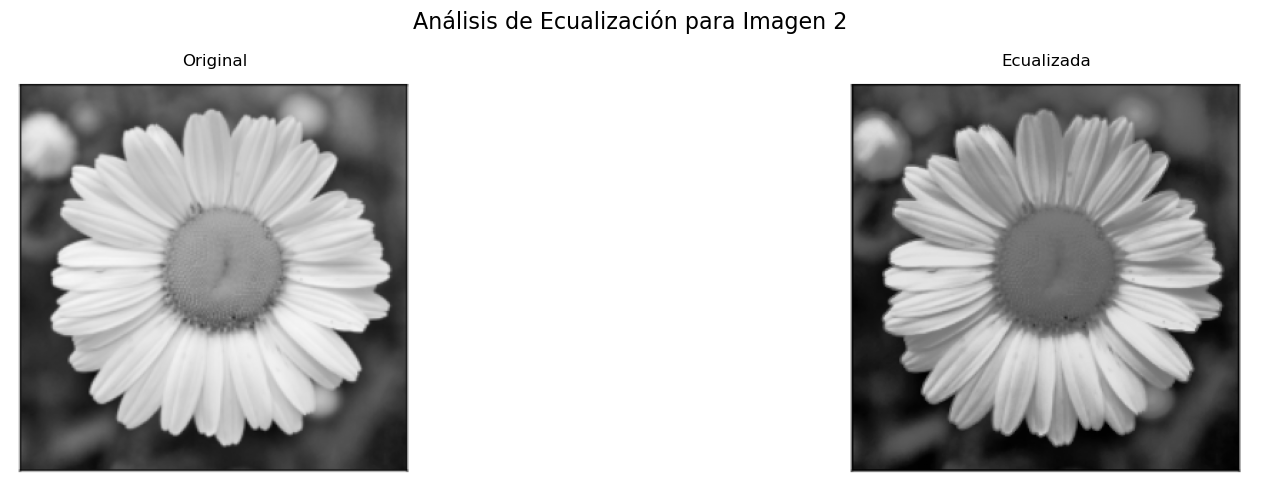

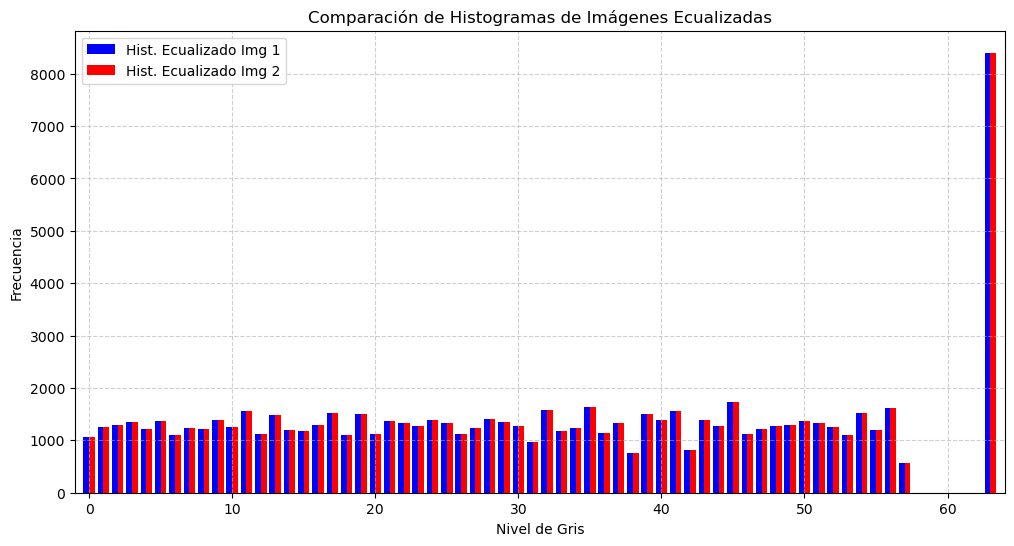

In [ ]:
bins = 64
x_pos = np.arange(bins)
ancho_barra = 0.4

# ==================================================================
# ANÁLISIS PARA IMAGEN 1
# ==================================================================

# 1. Crear la figura y los 3 subplots para la Imagen 1
fig1, axes1 = plt.subplots(1, 2, figsize=(20, 5))
fig1.suptitle('Análisis de Ecualización para Imagen 1', fontsize=16)

# 2. Ecualizar la imagen y calcular ambos histogramas
img1_eq = cv.equalizeHist(img1_gray)
hist1_orig, _ = np.histogram(img1_gray.ravel(), bins, [0, 256])
hist1_eq, _ = np.histogram(img1_eq.ravel(), bins, [0, 256])

# 3. Mostrar las imágenes
axes1[0].imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
axes1[0].set_title('Original')
axes1[0].axis('off')

axes1[1].imshow(img1_eq, cmap='gray', vmin=0, vmax=255)
axes1[1].set_title('Ecualizada')
axes1[1].axis('off')


# ==================================================================
# ANÁLISIS PARA IMAGEN 2
# ==================================================================

# 1. Crear la figura y los 3 subplots para la Imagen 2
fig2, axes2 = plt.subplots(1, 2, figsize=(20, 5))
fig2.suptitle('Análisis de Ecualización para Imagen 2', fontsize=16)

# 2. Ecualizar la imagen y calcular ambos histogramas
img2_eq = cv.equalizeHist(img2_gray)
hist2_orig, _ = np.histogram(img2_gray.ravel(), bins, [0, 256])
hist2_eq, _ = np.histogram(img2_eq.ravel(), bins, [0, 256])

# 3. Mostrar las imágenes
axes2[0].imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
axes2[0].set_title('Original')
axes2[0].axis('off')

axes2[1].imshow(img2_eq, cmap='gray', vmin=0, vmax=255)
axes2[1].set_title('Ecualizada')
axes2[1].axis('off')


plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.bar(x_pos - ancho_barra/2, hist1_eq, width=ancho_barra, color='blue', label='Hist. Ecualizado Img 1')
plt.bar(x_pos + ancho_barra/2, hist2_eq, width=ancho_barra, color='red', label='Hist. Ecualizado Img 2')

plt.title('Comparación de Histogramas de Imágenes Ecualizadas')
plt.xlabel('Nivel de Gris')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim([-1, bins])

plt.show()



Como se estableció en el análisis previo, en el punto de partida se tienen dos imágenes que son visualmente distintas en cuanto a la disposición espacial de sus elementos, pero que comparten un histograma de origen idénticamente distribuido. Esto las define como imágenes con las mismas propiedades tonales globales

A ambas imágenes se les aplicó el mismo algoritmo de ecualización (`cv.equalizeHist`), un proceso determinista que opera sobre la distribución estadística de los píxeles. El resultado de este proceso es que las imagenes sufrieron una transformación visual (particularmente notable en la imagen 2), y el histograma de cada imagen pasó de ser una distribución bimodal a una más uniforme, demostrando que la ecualización funcionó como se esperaba para cada caso individual. ambos histogramas siguen siendo iguales. 

Este resultado es la consecuencia lógica y la prueba fehaciente de que este algoritmo de ecualización es ciego al contexto y a la información espacial. Al recibir dos perfiles estadísticos de entrada que son idénticos, la función de mapeo que el algoritmo genera para redistribuir los píxeles es la misma para ambas imágenes. Por lo tanto, el perfil estadístico de salida (el nuevo histograma ecualizado) es idéntico en ambos casos.



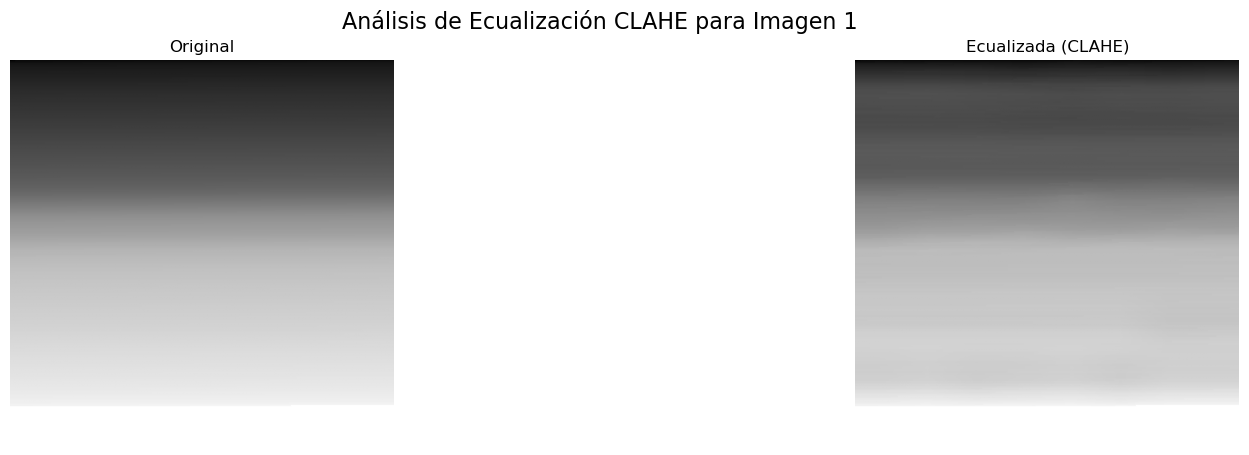

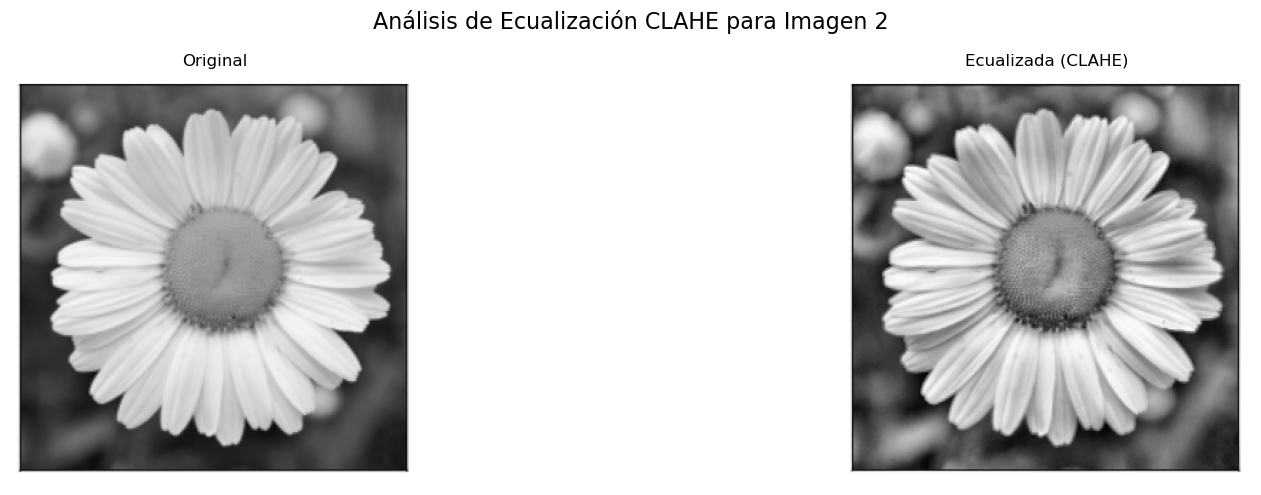

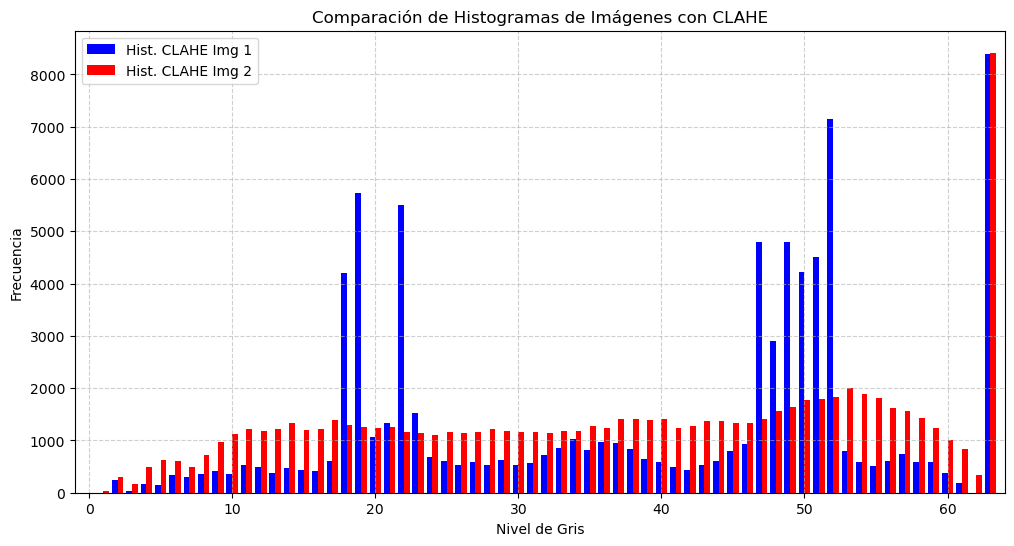

In [ ]:
bins = 64
x_pos = np.arange(bins)
ancho_barra = 0.4

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# ==================================================================
# ANÁLISIS CLAHE PARA IMAGEN 1
# ==================================================================


fig1, axes1 = plt.subplots(1, 2, figsize=(20, 5))
fig1.suptitle('Análisis de Ecualización CLAHE para Imagen 1', fontsize=16)


img1_clahe = clahe.apply(img1_gray)
hist1_orig, _ = np.histogram(img1_gray.ravel(), bins, [0, 256])
hist1_clahe, _ = np.histogram(img1_clahe.ravel(), bins, [0, 256])


axes1[0].imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
axes1[0].set_title('Original')
axes1[0].axis('off')

axes1[1].imshow(img1_clahe, cmap='gray', vmin=0, vmax=255)
axes1[1].set_title('Ecualizada (CLAHE)')
axes1[1].axis('off')


# ==================================================================
# ANÁLISIS CLAHE PARA IMAGEN 2
# ==================================================================


fig2, axes2 = plt.subplots(1, 2, figsize=(20, 5))
fig2.suptitle('Análisis de Ecualización CLAHE para Imagen 2', fontsize=16)


img2_clahe = clahe.apply(img2_gray)
hist2_orig, _ = np.histogram(img2_gray.ravel(), bins, [0, 256])
hist2_clahe, _ = np.histogram(img2_clahe.ravel(), bins, [0, 256])


axes2[0].imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
axes2[0].set_title('Original')
axes2[0].axis('off')

axes2[1].imshow(img2_clahe, cmap='gray', vmin=0, vmax=255)
axes2[1].set_title('Ecualizada (CLAHE)')
axes2[1].axis('off')


plt.tight_layout()

# ==================================================================
# GRÁFICA COMPARATIVA FINAL DE HISTOGRAMAS CLAHE
# ==================================================================
plt.figure(figsize=(12, 6))


plt.bar(x_pos - ancho_barra/2, hist1_clahe, width=ancho_barra, color='blue', label='Hist. CLAHE Img 1')
plt.bar(x_pos + ancho_barra/2, hist2_clahe, width=ancho_barra, color='red', label='Hist. CLAHE Img 2')

plt.title('Comparación de Histogramas de Imágenes con CLAHE')
plt.xlabel('Nivel de Gris')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim([-1, bins])


plt.show()

### Conclusión Final: Superioridad del Análisis Local (CLAHE) frente al Global

El experimento final consistió en aplicar el algoritmo de ecualización adaptativa de histograma con contraste limitado (CLAHE) a las imágenes `img1_tp.png` y `img2_tp.png`. El objetivo era comparar los resultados de esta técnica avanzada con los obtenidos previamente mediante la ecualización de histograma global.

**1. Observación Principal**

El resultado más significativo de aplicar CLAHE es que, a diferencia de la ecualización global, los histogramas de las dos imágenes resultantes **ya no son idénticos**. Como se observa en la gráfica comparativa, si bien ambos histogramas  se extienden por todo el rango dinámico, sus formas y distribuciones presentan diferencias notables bin a bin.

Visualmente, ambas imágenes muestran una mejora de contraste significativa y natural, realzando los detalles de las células sin introducir artefactos notorios.

**2. Análisis de la Causa**

Esta divergencia en los resultados, partiendo de dos imágenes con histogramas originales idénticos, se debe a la naturaleza **local y adaptativa** del algoritmo CLAHE, en contraposición al enfoque global de la ecualización estándar.

* **Análisis Global:** La ecualización estándar calcula un único histograma para toda la imagen y aplica una sola transformación. Al partir de dos histogramas globales idénticos, el resultado estadístico también fue idénticamente global.

* **Análisis Local (CLAHE):** CLAHE, por otro lado, divide cada imagen en una cuadrícula de regiones más pequeñas y realiza una ecualización de contraste limitado de forma independiente en cada una. Dado que `Imagen 1` e `Imagen 2` poseen una **disposición espacial de píxeles diferente**, el contenido y, por lo tanto, el histograma local de las regiones correspondientes es distinto en cada imagen. Al aplicar transformaciones locales diferentes, el resultado final agregado (el histograma global de la imagen procesada) es necesariamente diferente para cada una.

**3. Conclusión Definitiva**

Este experimento demuestra de manera concluyente la superioridad de los métodos adaptativos como CLAHE para el análisis y la mejora de imágenes. Se ha probado que CLAHE es capaz de "ver" y adaptarse a las diferencias estructurales y espaciales que son invisibles para los métodos globales.

Al operar localmente, no solo produce una mejora de contraste visualmente más natural y detallada, sino que también genera un resultado estadístico único que refleja la composición espacial particular de la imagen de entrada. Esto lo convierte en una herramienta mucho más robusta y sensible para el procesamiento de imágenes del mundo real, capaz de diferenciar y procesar de manera única imágenes que los métodos globales considerarían idénticas.